In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORTING DATSET AND FIRST 5 ROWS VIEW
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#MISSING VALUES
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#DROPPING THE CABIN COLUMN
df.drop(['Cabin'], axis=1, inplace=True)
#FILLING MISSING VALUE OF AGE COLUMN WITH THE COLUMN MEDIAN
df['Age'].fillna(df['Age'].median())
#FILLING THE MISSING VALUES OF EMBARKED COLUMN WITH THE COLUMN MODE
df['Embarked'].fillna(df['Embarked'].mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [7]:
df.shape

(891, 11)

In [8]:
#COUNT OF SURVIVORS
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
#COUNT OF PASSENGER CLASS
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
#COUNT OF GENDER OF PASSENGERS
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [11]:
#COUNT OF SIBLING/SPOUSE
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [12]:
#COUNT OF PARENTS/CHILDREN
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [13]:
#COUNT OF EMBARKED
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

COUNTPLOT VISUALIZATION OF THE OBJECT DTYPE COLUMNS

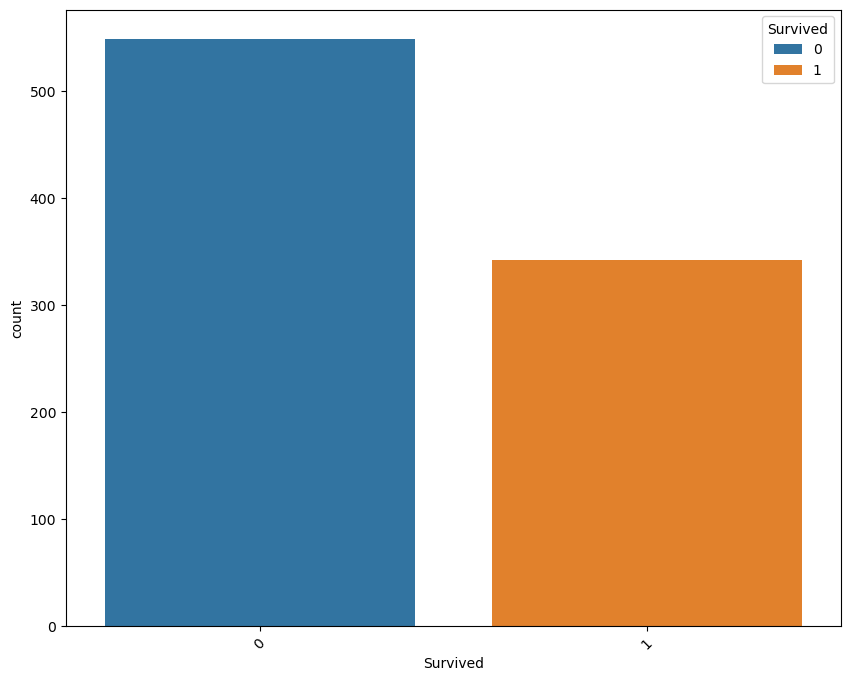

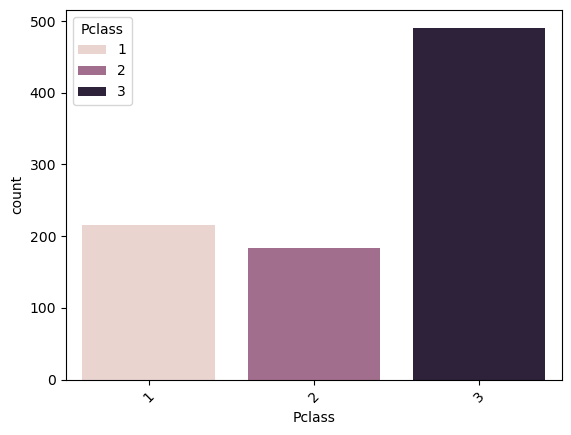

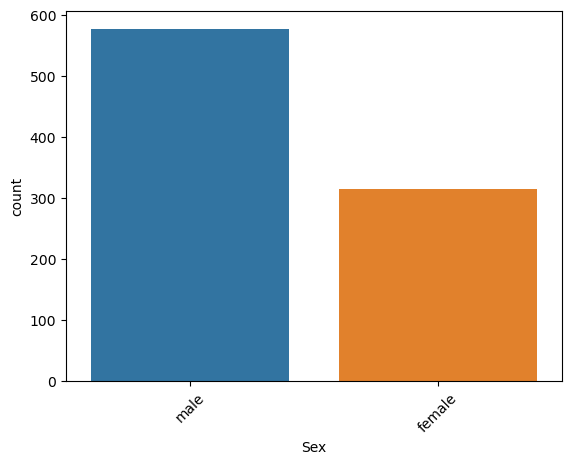

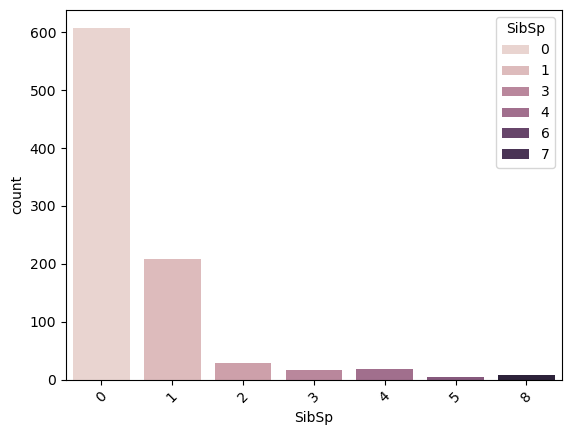

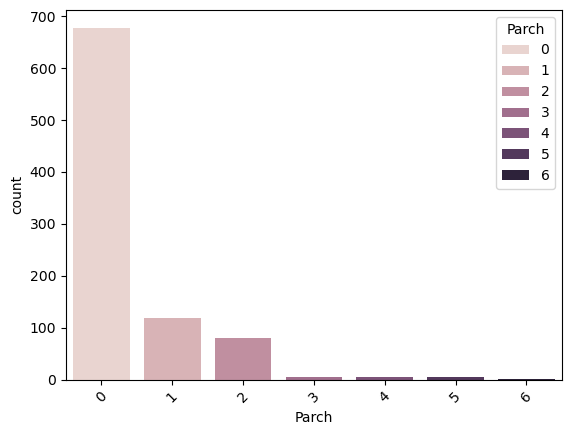

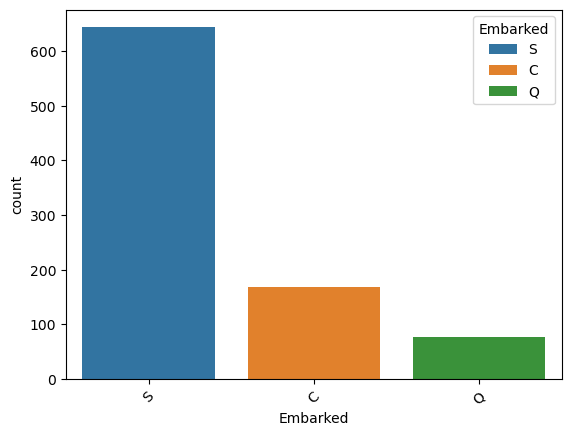

In [14]:
plt.figure(figsize=(10,8))
for col in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    sns.countplot(df, x=col, hue=col)
    plt.xticks(rotation=45)
    plt.show()

DISTRIBUTION PLOT OF THE DATASET

In [15]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

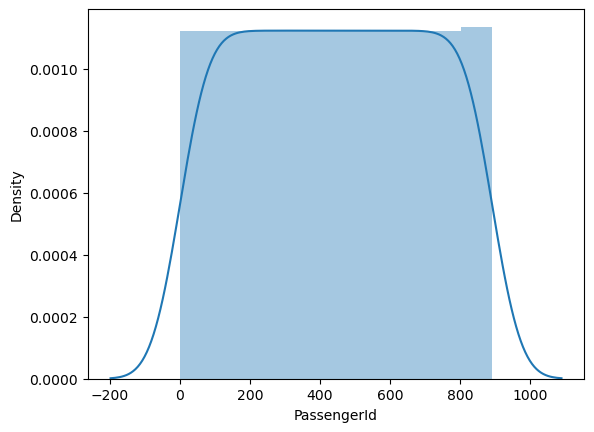

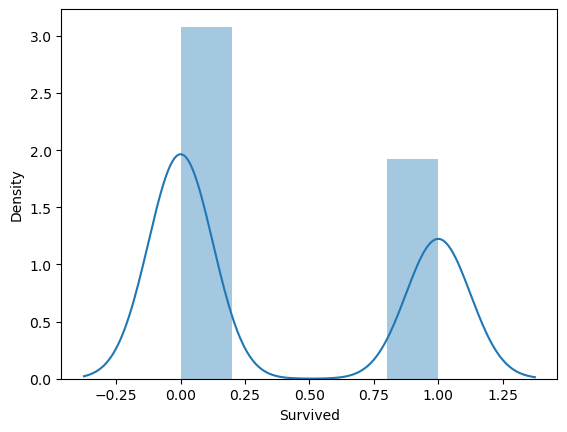

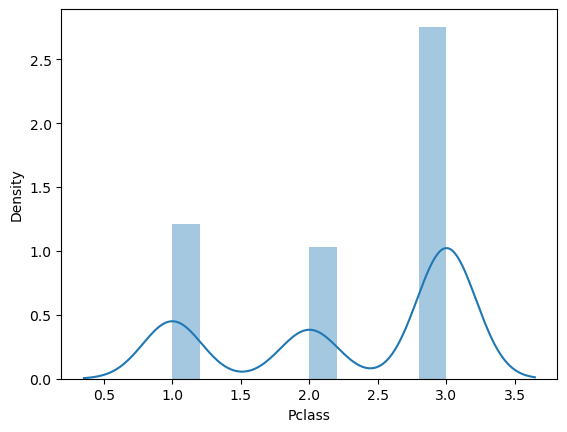

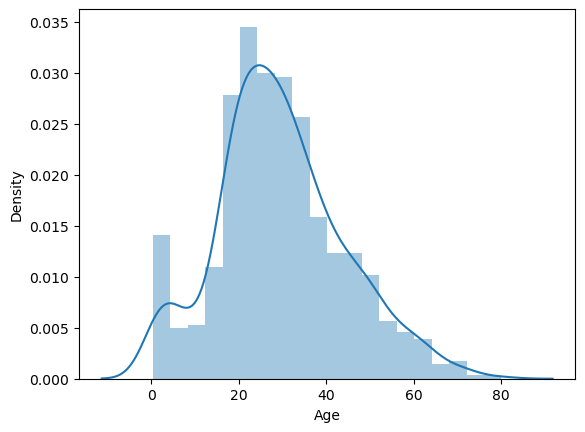

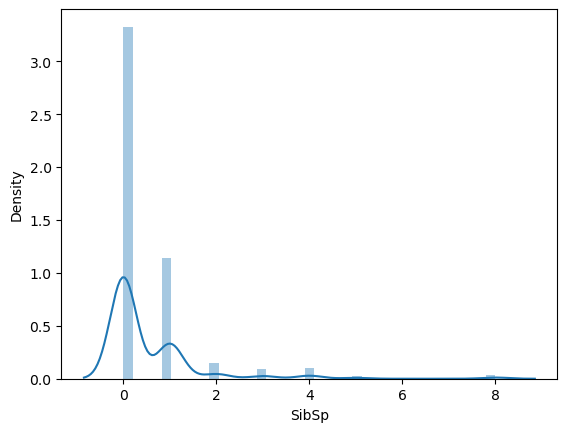

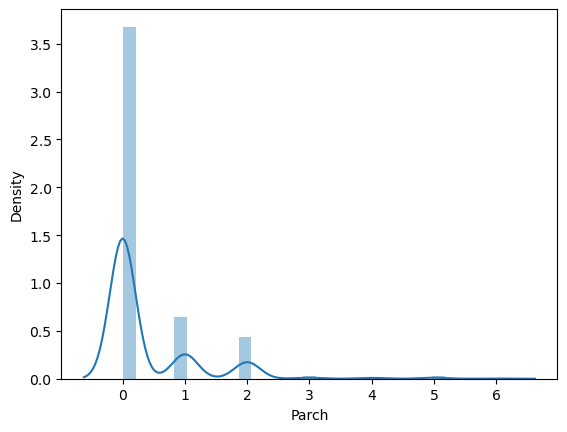

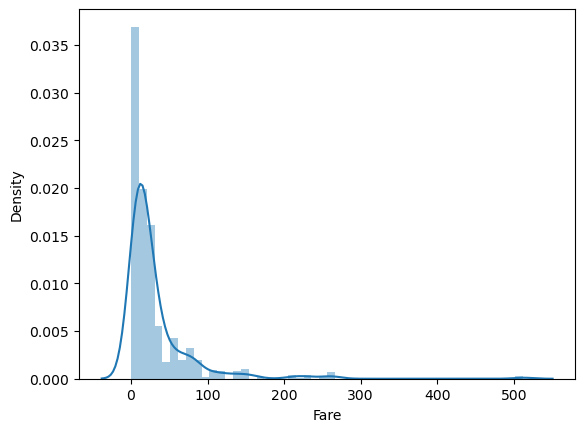

In [16]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

HISPLOT VISUALIZATION OF THE DATASET

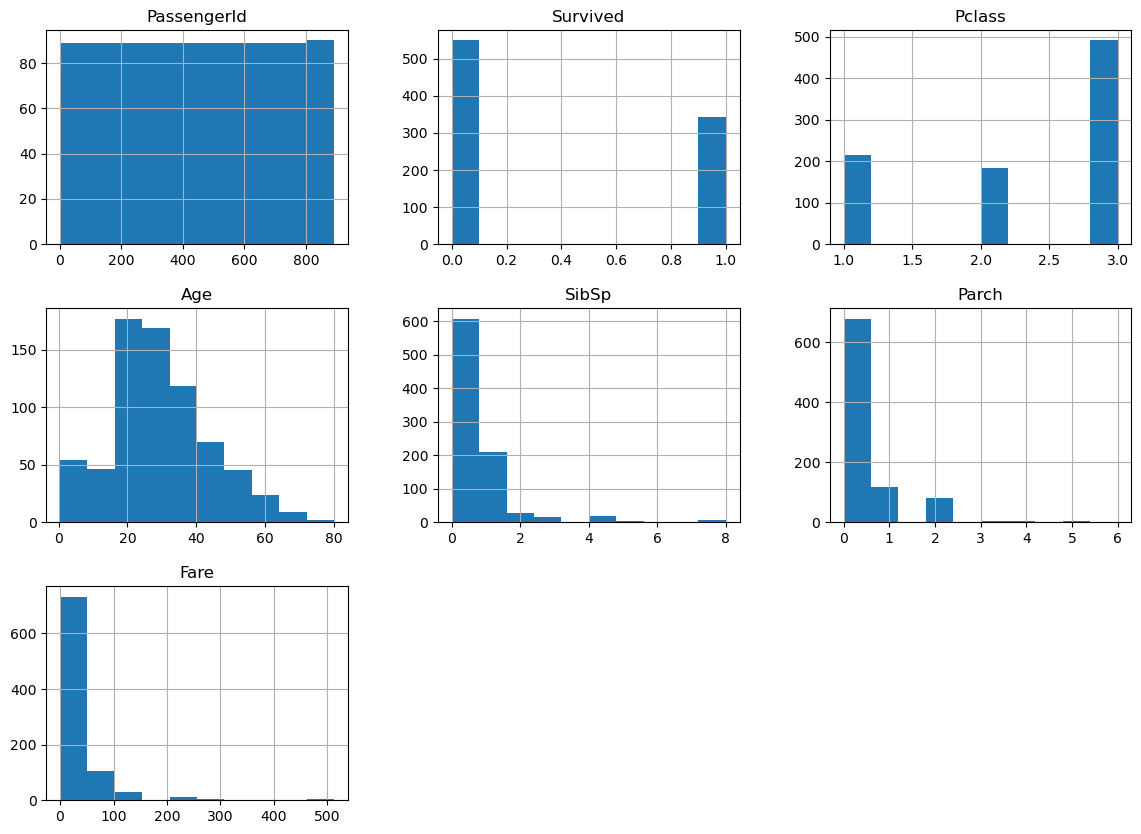

In [17]:
df.hist(bins=10, figsize=(14,10))
plt.show()

ANALYSIS OF DATA BASED ON SEX AND ITS VISUALIZATION

In [18]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

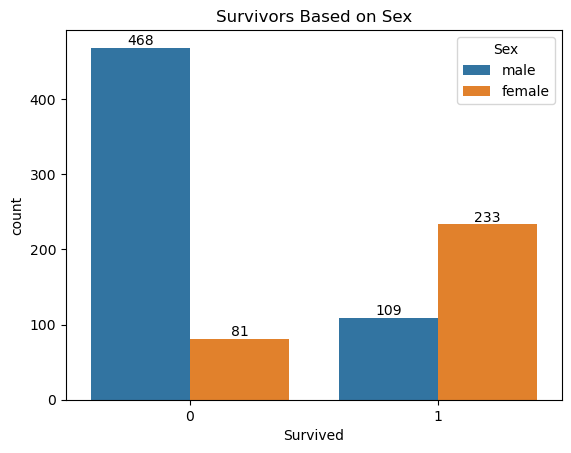

In [19]:
ax=sns.countplot(df, x='Survived', hue='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Survivors Based on Sex')
plt.show()    

In [20]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: count, dtype: int64

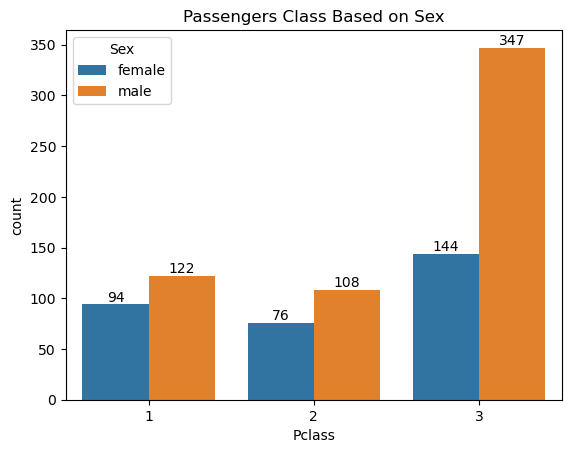

In [21]:
ax=sns.countplot(df, x='Pclass', hue='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Passengers Class Based on Sex')
plt.show()

In [22]:
df.groupby('Sex')['SibSp'].value_counts()

Sex     SibSp
female  0        174
        1        106
        2         13
        3         11
        4          6
        8          3
        5          1
male    0        434
        1        103
        2         15
        4         12
        3          5
        5          4
        8          4
Name: count, dtype: int64

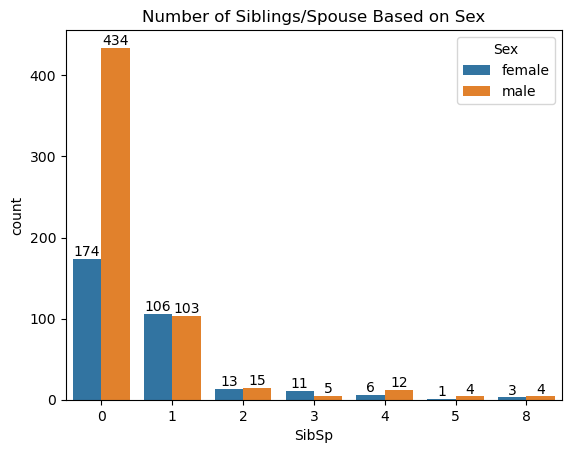

In [23]:
ax=sns.countplot(df, x='SibSp', hue='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of Siblings/Spouse Based on Sex')
plt.show()

In [24]:
df.groupby('Sex')['Parch'].value_counts()

Sex     Parch
female  0        194
        1         60
        2         49
        3          4
        5          4
        4          2
        6          1
male    0        484
        1         58
        2         31
        4          2
        3          1
        5          1
Name: count, dtype: int64

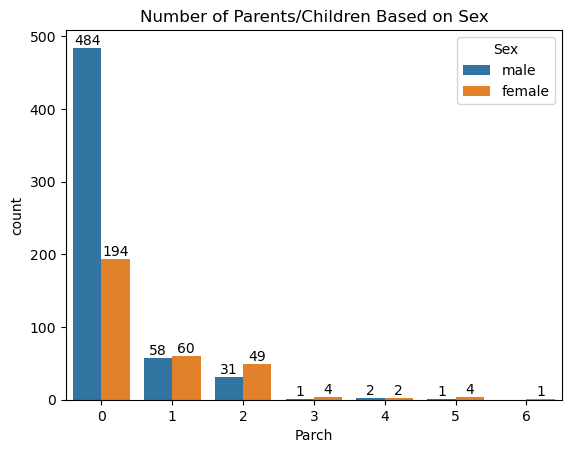

In [25]:
ax=sns.countplot(df, x='Parch', hue='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of Parents/Children Based on Sex')
plt.show()

In [26]:
df.groupby('Sex')['Embarked'].value_counts()

Sex     Embarked
female  S           203
        C            73
        Q            36
male    S           441
        C            95
        Q            41
Name: count, dtype: int64

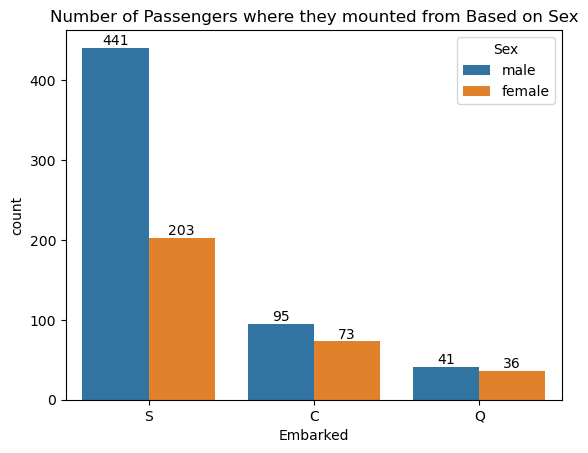

In [27]:
ax=sns.countplot(df, x='Embarked', hue='Sex')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of Passengers where they mounted from Based on Sex')
plt.show()

In [28]:
#MINIMUN AGE OF THE PASSENGERS
df['Age'].min()

0.42

In [29]:
#MAXIMUM AGE OF PASSENGERS
df['Age'].max()

80.0

In [30]:
#AVERAGE AGE OF PASSENGERS
df['Age'].median()

28.0

In [31]:
#MINIMUM FARE PAID BY PASSENGER
df['Fare'].min()

0.0

In [32]:
#MAXIMUM FAREPAID BY PASSENGER
df['Fare'].max()

512.3292

In [33]:
#AVERAGE FARE PAID BY PASSENGERS
df['Fare'].median()

14.4542